<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [31]:
data=pd.read_csv("DMV_Written_Tests (1).csv")
data.head()





,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

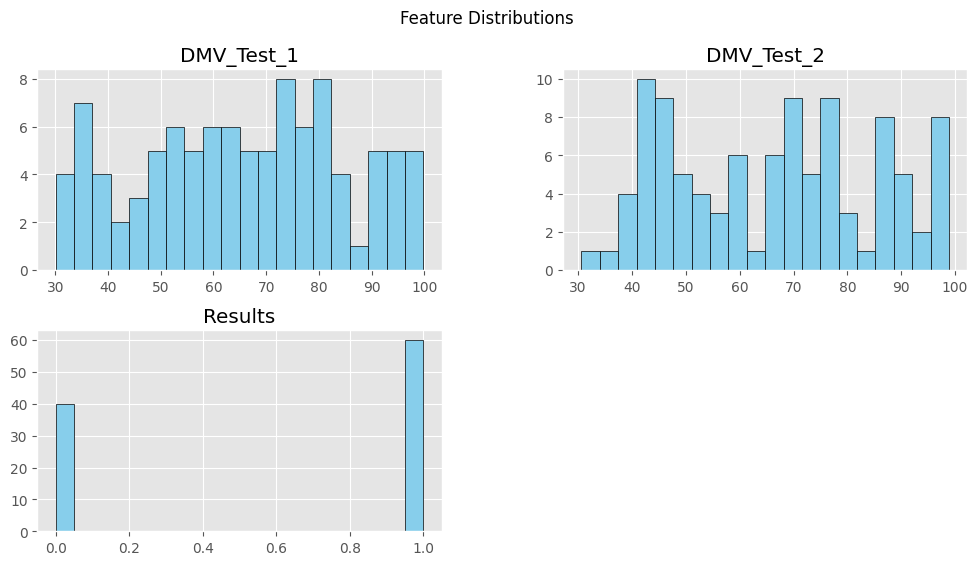

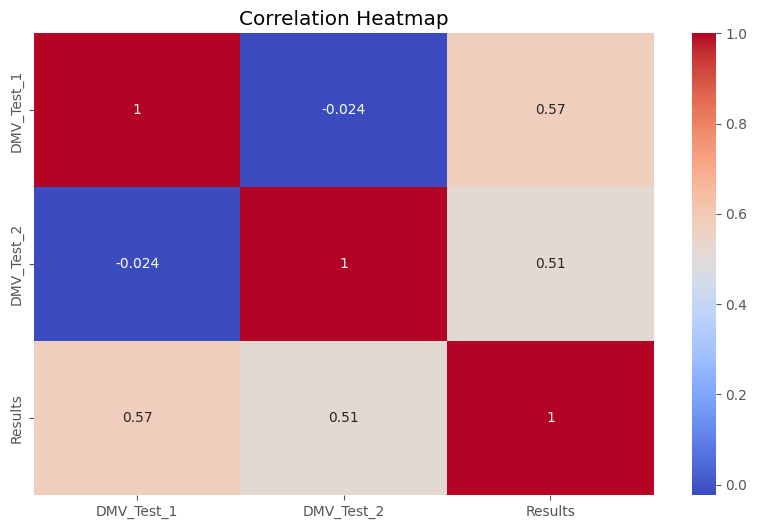

In [32]:
#Histograms of numeric features
data.hist(bins=20, figsize=(12, 6), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap (only for numeric features)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

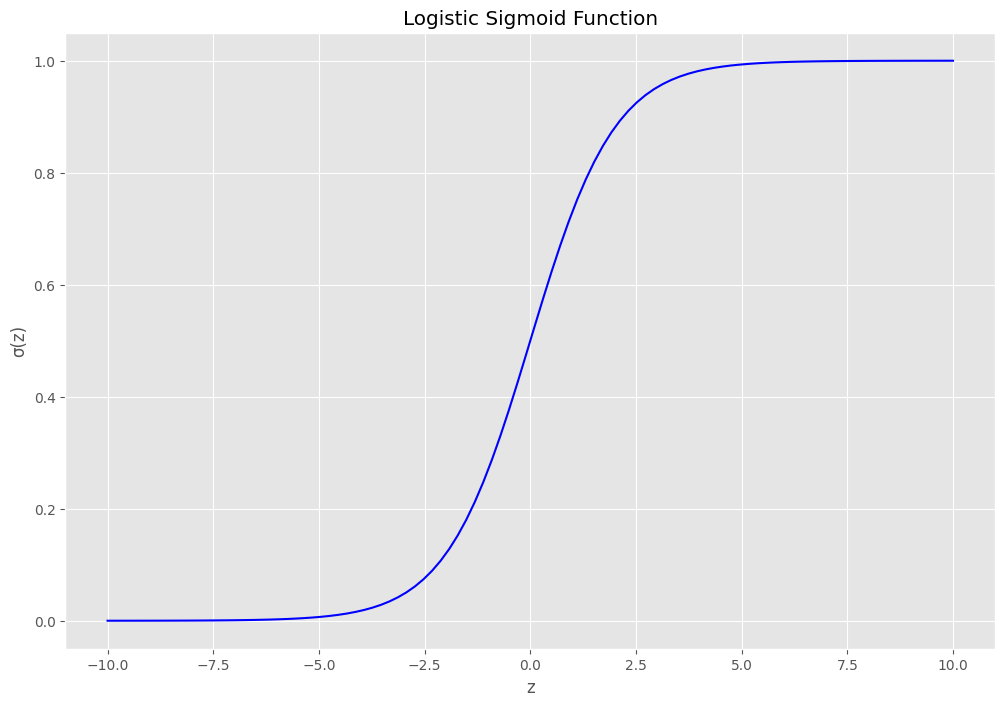

In [33]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test values
z = np.linspace(-10, 10, 100)
sigma = sigmoid(z)

# Plot sigmoid
plt.plot(z, sigma, color="blue")
plt.title("Logistic Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [34]:
def compute_cost(theta, X, y):
    m = y.shape[0]
    h = sigmoid(X.dot(theta))
    eps = 1e-12  # avoid log(0)
    h = np.clip(h, eps, 1 - eps)
    return -(1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))

In [35]:
def compute_gradient(theta, X, y):
    m = y.shape[0]
    h = sigmoid(X.dot(theta))
    return (1/m) * X.T.dot(h - y)

### Task 6: Cost and Gradient at Initialization
---

In [36]:
X = data[["DMV_Test_1", "DMV_Test_2"]].values
y = data["Results"].values

# Add intercept (bias) column
m = X.shape[0]
X = np.hstack([np.ones((m, 1)), X])  # shape (m, n+1)

# Initialize theta with zeros
theta_init = np.zeros(X.shape[1])

# Compute cost and gradient
J_init = compute_cost(theta_init, X, y)
grad_init = compute_gradient(theta_init, X, y)

print("Cost at initialization:", J_init)
print("Gradient at initialization:", grad_init)

Cost at initialization: 0.6931471805599453
Gradient at initialization: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [37]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []

    for i in range(num_iters):
        # Compute gradient
        grad = compute_gradient(theta, X, y)

        # Update theta
        theta = theta - alpha * grad

        # Save current cost
        J_history.append(compute_cost(theta, X, y))

    return theta, J_history


In [38]:
theta_init = np.zeros(X.shape[1])
alpha = 0.001
num_iters = 10000

theta_opt, J_history = gradient_descent(X, y, theta_init, alpha, num_iters)

print("Optimized theta:", theta_opt)
print("Final cost:", J_history[-1])


Optimized theta: [-0.66896603  0.0150915   0.00566237]
Final cost: 0.5850274988176747


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

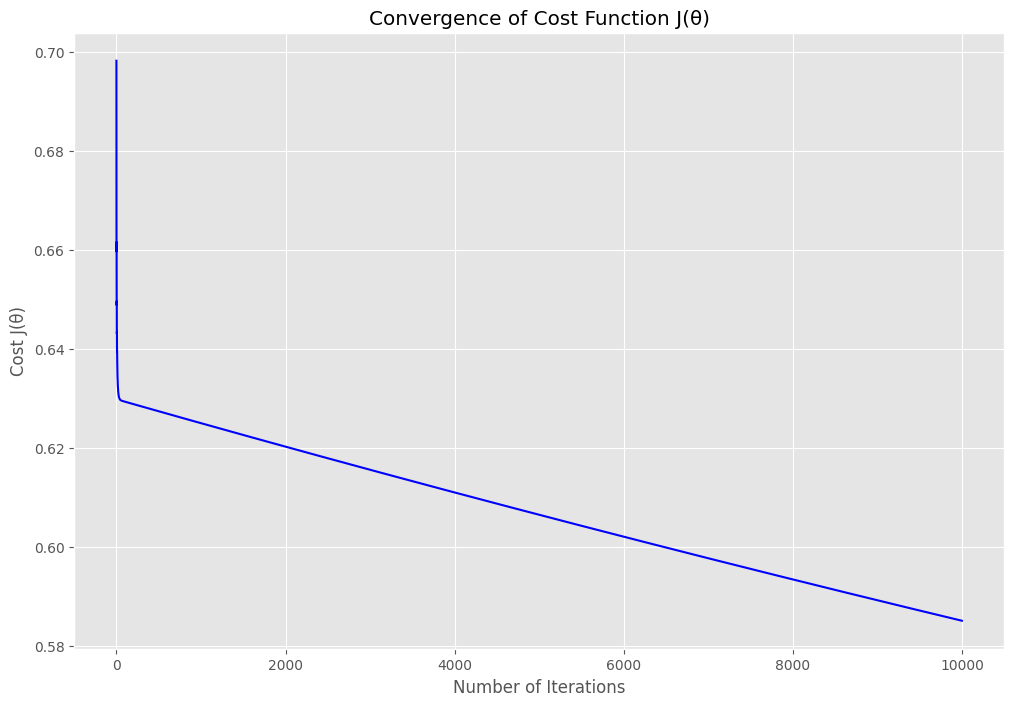

In [39]:
plt.plot(range(len(J_history)), J_history, color="blue")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Cost Function J(θ)")
plt.grid(True)
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

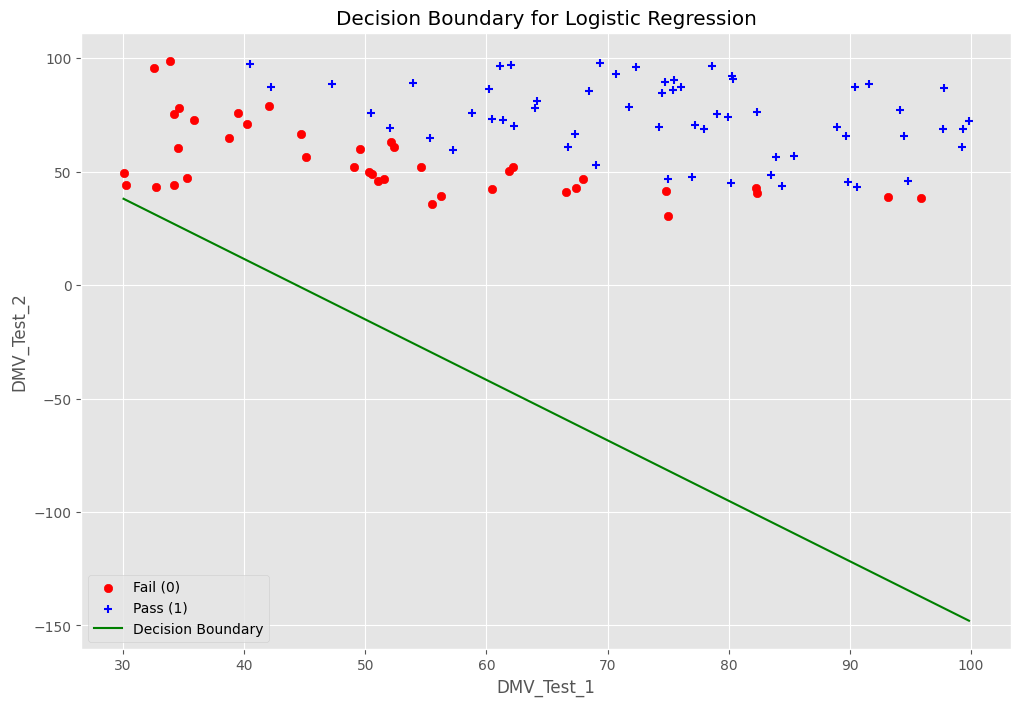

In [40]:
def plot_decision_boundary(theta, X, y):

    plt.scatter(X[y==0, 1], X[y==0, 2], c='red', marker='o', label="Fail (0)")
    plt.scatter(X[y==1, 1], X[y==1, 2], c='blue', marker='+', label="Pass (1)")

    # Decision boundary: θ0 + θ1*x1 + θ2*x2 = 0
    x_values = [X[:,1].min(), X[:,1].max()]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]

    # Plot boundary line
    plt.plot(x_values, y_values, label="Decision Boundary", color="green")

    # Labels
    plt.xlabel("DMV_Test_1")
    plt.ylabel("DMV_Test_2")
    plt.legend()
    plt.title("Decision Boundary for Logistic Regression")
    plt.grid(True)
    plt.show()


# Call the function using optimized theta
plot_decision_boundary(theta_opt, X, y)


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [41]:
# Prediction function
def predict(theta, X):

    probs = sigmoid(X.dot(theta))
    return (probs >= 0.5).astype(int)


# Make predictions using optimized theta
predictions = predict(theta_opt, X)

# Compare with actual labels
print("First 10 Predictions:", predictions[:10])
print("First 10 Actual:", y[:10])

# Compute accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


First 10 Predictions: [1 1 1 1 1 1 1 1 1 1]
First 10 Actual: [0 0 0 1 1 0 1 1 1 1]
Training Accuracy: 60.00%
